In [1]:
from mxnet import nd
import matplotlib.pyplot as plt

## __Defining Piecewise Linear Unit function__

In [2]:
def plu(x, alpha = 0.2, c = 1.0):
    return nd.maximum((alpha * (x + c)) - c, nd.minimum((alpha * (x - c)) + c, x))

Below we are generating x values from range -10 to 10 with subsequent value of 0.1, that is last point -10, then -10 + 0.1 = -9.9, then -9.9 + 0.1 = -9.8.... and so on. This is what nd.arange function does

In [3]:
xs = nd.arange(-10, 10, 0.1)
ys = plu(xs)

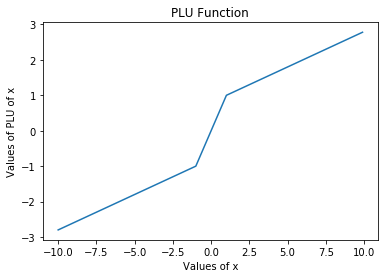

In [5]:
# matplotlib doesn't support mxnet's ndarray but it supports numpy's ndarray, so we need to convert xs and ys to numpy ndarray by calling .asnumpy() method
plt.plot(xs.asnumpy(), ys.asnumpy())
plt.xlabel('Values of x')
plt.ylabel('Values of PLU of x')
plt.title('PLU Function')
plt.show()

## __Lets see how PLU changes when we take alpha constant and changes c and vice-versa__

Alpha is constant and equal to 0.2 and C changes


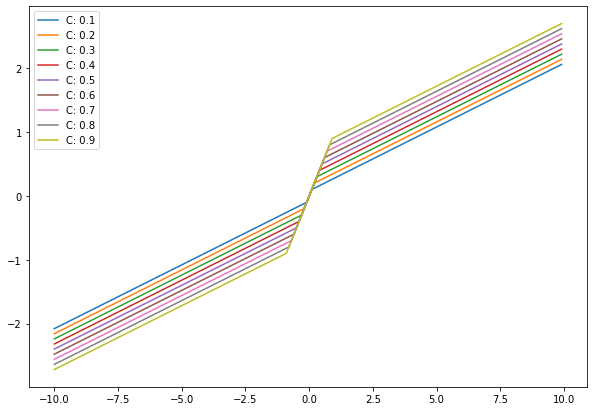

In [6]:
print('Alpha is constant and equal to 0.2 and C changes')
cs = nd.arange(0.1, 1.0, 0.1)
plt.figure(figsize = (10, 7))
for c in cs:
    plt.plot(xs.asnumpy(), plu(xs, alpha = 0.2, c = c).asnumpy(), label = f'C: {c.asscalar():.1f}')
plt.legend()
plt.show()

Now C is constant and equal to 1.0 and alpha changes


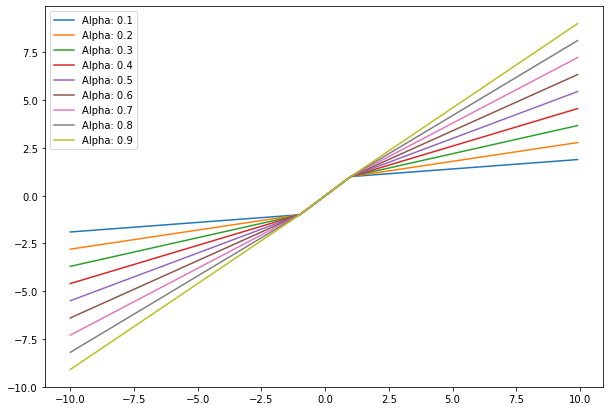

In [7]:
print('Now C is constant and equal to 1.0 and alpha changes')
alphas = nd.arange(0.1, 1.0, 0.1)
plt.figure(figsize = (10, 7))
for alpha in alphas:
    plt.plot(xs.asnumpy(), plu(xs, alpha, c = 1.0).asnumpy(), label = f'Alpha: {alpha.asscalar():.1f}')
plt.legend()
plt.show()

## __Now defining derivative of plu funciton__

In [8]:
def plu_derivative(x, alpha = 0.2, c = 0.1):
    return nd.where(nd.abs(x) > c, nd.ones_like(x) * alpha, nd.ones_like(x))

In [9]:
dxs = nd.arange(-10, 10, 0.1)
dys = plu_derivative(dxs)

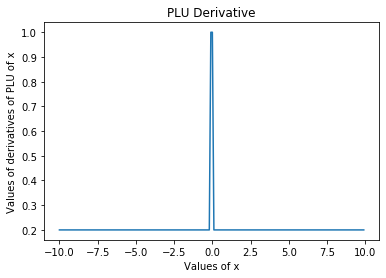

In [10]:
# matplotlib doesn't support mxnet's ndarray but it supports numpy's ndarray, so we need to convert xs and ys to numpy ndarray by calling .asnumpy() method
plt.plot(dxs.asnumpy(), dys.asnumpy())
plt.xlabel('Values of x')
plt.ylabel('Values of derivatives of PLU of x')
plt.title('PLU Derivative')
plt.show()

## __Lets see how the derivative of PLU changes as we change alpha paramter__

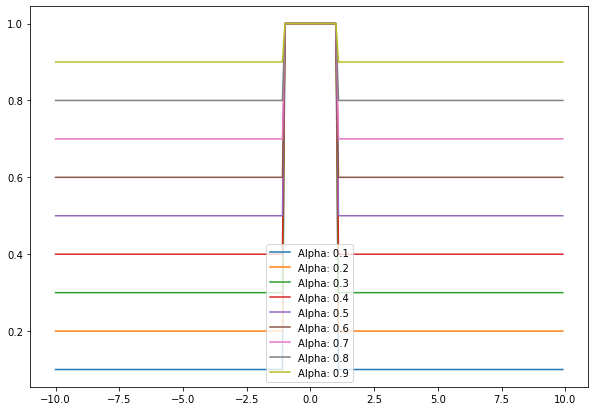

In [11]:
alphas = nd.arange(0.1, 1.0, 0.1)
plt.figure(figsize = (10, 7))
for alpha in alphas:
    plt.plot(xs.asnumpy(), plu_derivative(xs, alpha = alpha, c = 1.0).asnumpy(), label = f'Alpha: {alpha.asscalar():.1f}')
plt.legend()
plt.show()

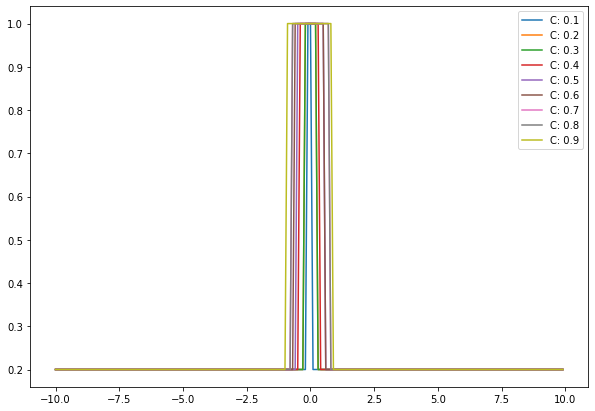

In [12]:
cs = nd.arange(0.1, 1.0, 0.1)
plt.figure(figsize = (10, 7))
for c in cs:
    plt.plot(xs.asnumpy(), plu_derivative(xs, alpha = 0.2, c = c).asnumpy(), label = f'C: {c.asscalar():.1f}')
plt.legend()
plt.show()

## __Plotting PLU function and it's derivative together for alpha = 0.2 and c = 1.0__

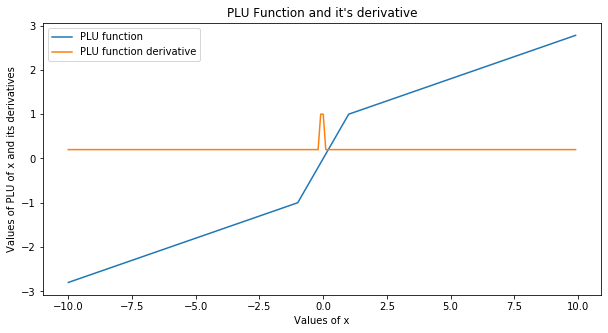

In [13]:
# matplotlib doesn't support mxnet's ndarray but it supports numpy's ndarray, so we need to convert xs and ys to numpy ndarray by calling .asnumpy() method
plt.figure(figsize = (10, 5))
plt.plot(xs.asnumpy(), ys.asnumpy(), label = 'PLU function')
plt.plot(dxs.asnumpy(), dys.asnumpy(), label = 'PLU function derivative')
plt.xlabel('Values of x')
plt.ylabel('Values of PLU of x and its derivatives')
plt.title("PLU Function and it's derivative")
plt.legend()
plt.show()

In [14]:
dys.max().asscalar() 

1.0